<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import urllib.request

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
urllib.request.urlretrieve(url, "pizza_steak.zip")


('pizza_steak.zip', <http.client.HTTPMessage at 0x1a6f9ca17f0>)

In [27]:
import zipfile

zipp = zipfile.ZipFile("pizza_steak.zip")  # Open the zip file
zipp.extractall()  # Extract the contents
zipp.close()  # Close the file


In [17]:
import os
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [19]:
def random_Image(direc, classs):
  folder = direc + classs
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  return img

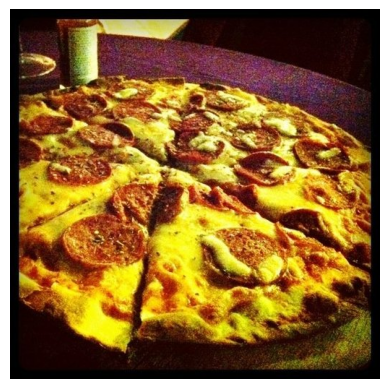

In [22]:
img = random_Image("pizza_steak/train/", "pizza")

In [23]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [25]:
img.shape

(512, 512, 3)

#**Steps to build CNN Model**
* Load Images
* Preprocess images
* Build CNN model to find patterns
* Compile and Fit CNN model



In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

#Preprocess data to get all pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)



In [74]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=25,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.


In [75]:
len(train_data)

60

In [76]:
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=25,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 500 images belonging to 2 classes.


In [77]:
len(valid_data)

20

In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [79]:
#Compilation
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [86]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=25,
                    validation_data=valid_data,
                    validation_steps=25)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.9839 - loss: 0.0951 - val_accuracy: 0.8280 - val_loss: 0.5035
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.9807 - loss: 0.0489 - val_accuracy: 0.8120 - val_loss: 0.5571
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.9929 - loss: 0.0330 - val_accuracy: 0.8440 - val_loss: 0.5051
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.9923 - loss: 0.0337 - val_accuracy: 0.8220 - val_loss: 0.5807
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.9977 - loss: 0.0144 - val_accuracy: 0.8360 - val_loss: 0.5815
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9974 - loss: 0.0141 - val_accuracy: 0.8300 - val_loss: 0.6463
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.9976 - loss: 0.0102 - val_accuracy: 0.8180 - val_loss: 0.6962
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.9904 - loss: 0.0286 - val_accuracy: 0.

In [87]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)